GRAPH SUGGESTED BY INNOCENT

HAVE THE THINGS ON TOP OF EACH OTHER. 

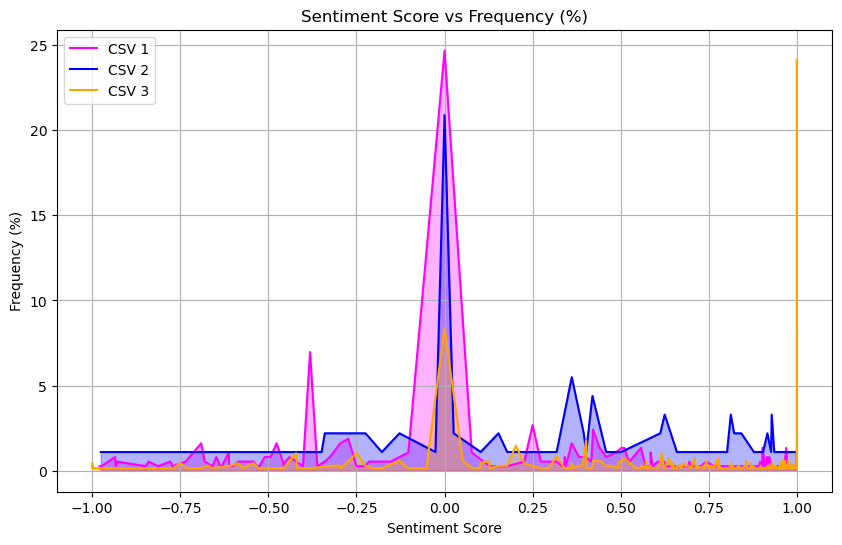

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

# File paths for the three CSVs
csv_files = [
    r'datasets/combined/government_combined_output.csv',  # Replace with the actual path to your first CSV
    r'datasets/combined/privateorg_combined_output.csv',  # Replace with the actual path to your second CSV
    r'datasets/combined/nonprofit_combined_output.csv'   # Replace with the actual path to your third CSV
]

# Colors for the graph
colors = ['magenta', 'blue', 'orange']

# Initialize the plot
plt.figure(figsize=(10, 6))

# Process each CSV
for i, file in enumerate(csv_files):
    # Read the CSV
    df = pd.read_csv(file)
    
    
    # Calculate frequency counts
    sentiment_counts = df['sentiment'].value_counts().sort_index()
    
    # Calculate frequency as a percentage of the total
    total_count = sentiment_counts.sum()
    sentiment_percent = (sentiment_counts / total_count) * 100

    
    # Plot the data
    plt.plot(sentiment_percent.index, sentiment_percent.values, label=f'CSV {i+1}', color=colors[i])

    plt.fill_between(sentiment_percent.index, sentiment_percent.values, color=colors[i], alpha=0.3)

# Add labels, title, and legend
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency (%)')
plt.title('Sentiment Score vs Frequency (%)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

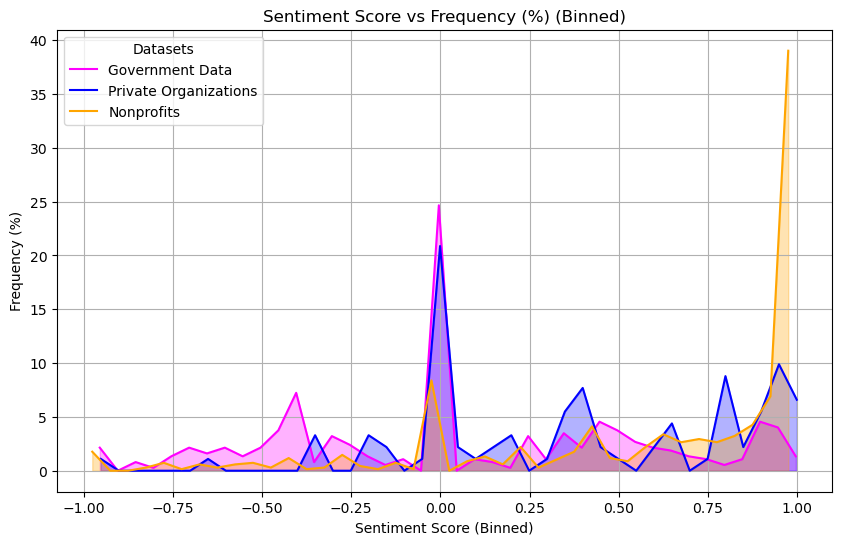

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# File paths for the three CSVs
csv_files = [
     r'datasets/combined/government_combined_output.csv',  # Replace with the actual path to your first CSV
    r'datasets/combined/privateorg_combined_output.csv',  # Replace with the actual path to your second CSV
    r'datasets/combined/nonprofit_combined_output.csv'   # Replace with the actual path to your third CSV
]

# Colors for the graph
colors = ['magenta', 'blue', 'orange']

# Initialize the plot
plt.figure(figsize=(10, 6))

dataset_labels = ['Government Data', 'Private Organizations', 'Nonprofits']

# Process each CSV
for i, file in enumerate(csv_files):
    # Read the CSV
    df = pd.read_csv(file)
    
    # Create bins of size 0.05 for sentiment scores
    bin_edges = np.arange(df['sentiment'].min(), df['sentiment'].max() + 0.05, 0.05)
    df['binned_sentiment'] = pd.cut(df['sentiment'], bins=bin_edges, include_lowest=True)
    
    # Calculate frequency counts for each bin
    bin_counts = df['binned_sentiment'].value_counts().sort_index()
    
    # Calculate frequency as a percentage of the total
    total_count = bin_counts.sum()
    bin_percentages = (bin_counts / total_count) * 100
    
    # Plot the data
    bin_centers = [interval.mid for interval in bin_percentages.index]  # Get bin centers for plotting
    plt.plot(bin_centers, bin_percentages.values, label=dataset_labels[i], color=colors[i])
    
    # Highlight the area under the curve
    plt.fill_between(bin_centers, bin_percentages.values, color=colors[i], alpha=0.3)

# Add labels, title, and legend
plt.xlabel('Sentiment Score (Binned)')
plt.ylabel('Frequency (%)')
plt.title('Sentiment Score vs Frequency (%) (Binned)')
plt.legend(title="Datasets")
plt.grid(True)

# Show the plot
plt.show()